# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [54]:
def matrix_multiply(A, B):
    if len(A[0]) == len(B):
        for i in range(len(A)):
            for j in range(len(B[0])):  
                for k in range(len(B)):  
                    result[i][j] += A[i][k] * B[k][j]  
        for r in result:  
            print(r)
    else:
        print('k != j')

In [57]:
A = np.array([
    [1,2,3],
    [4,5,6]
])

B = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])


result = [
    [0,0,0],
    [0,0,0]
]

In [58]:
matrix_multiply(A,B)

[30, 36, 42]
[66, 81, 96]


In [59]:
# verify
A.dot(B)

array([[30, 36, 42],
       [66, 81, 96]])

In [60]:
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

result = [  
    [0]  
] 

In [61]:
matrix_multiply(A,B)

[30]


In [62]:
# verify
A.dot(B)

array([[30]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [75]:
# 2.1

EX1 = np.array([
    [9,6],
    [12,8]
])

EX2 = np.array([
    [3,3],
    [5,5]
])

EX2 = np.array([
    [1,3],
    [2,6]
])

In [ ]:
# 2.2
    # ref: The identity matrix is always a square matrix
    
# "For any whole number n, there is a corresponding n×n identity matrix. 
# These matrices are said to be square since there is always the same number of rows and columns."

In [51]:
# 2.3
A = np.array([[-5,0,2],
              [1,-2,3],
              [6,-2,1]])

B = np.array([[5,-1,4],
              [2,3,4],
              [7,-1,2]])

C = np.array([[1,1,1],
              [1,1,1],
              [1,1,1]])

print(np.trace(A.dot(B).dot(C)))
print(np.trace(C.dot(B).dot(A)))

28
10


In [53]:
# 2.4
D = np.eye(4)
Di = D.dot(D)
print(D)
print(Di)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [74]:
# 2.5
A = np.array([[1,1,1], [0,2,5], [2,5,-1]])
B = np.array([6,-4,27])
X = np.linalg.solve(A,B)
X

array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [ ]:
# ref: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# ref: https://kgptalkie.com/linear-regression-with-python-machine-learlearning-kgp-talkie/

In [5]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns 
sns.set()


from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
# print(boston_dataset.DESCR)

In [7]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['PRICE'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\gayar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


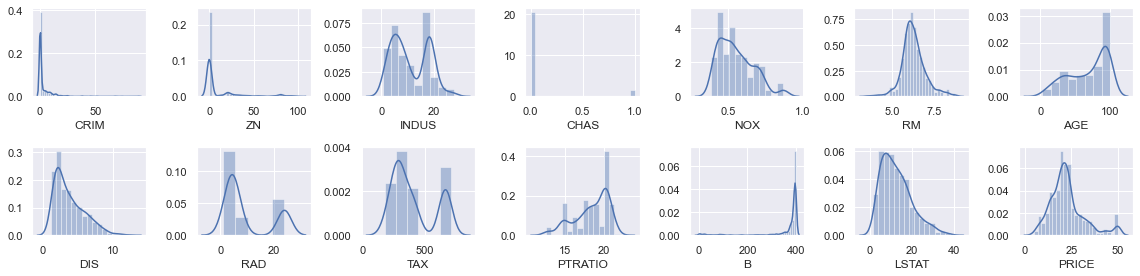

In [8]:
rows = 2
cols = 7
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))
col = boston.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(boston[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()
plt.show()

In [9]:
correlation_matrix = boston.corr()
correlation_matrix[correlation_matrix['PRICE'].abs() > 0.5]

# features with relation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
PRICE,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000


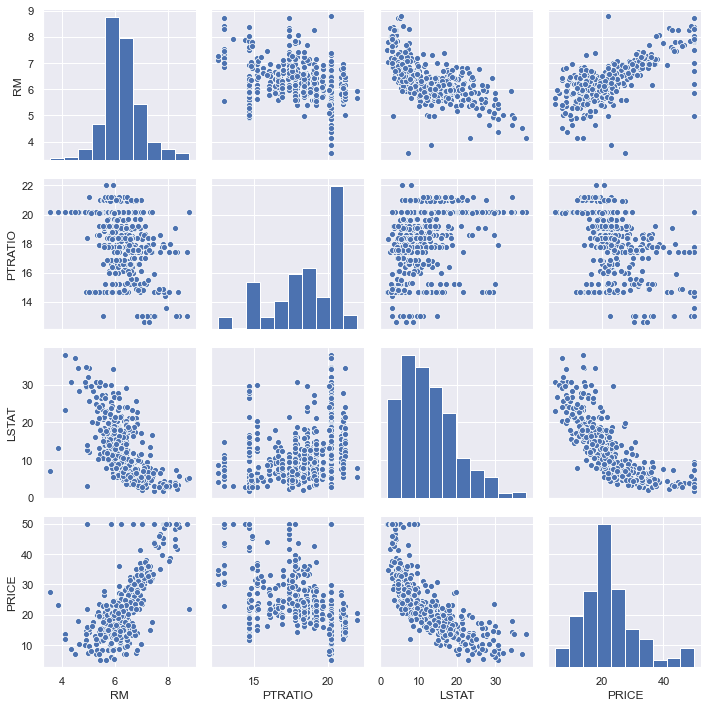

In [10]:
correlated_data = boston[['RM','PTRATIO','LSTAT','PRICE']]
correlated_data

sns.pairplot(correlated_data)
plt.tight_layout()

In [26]:
X = correlated_data.drop(labels=['PRICE'], axis = 1)
y = correlated_data['PRICE']

In [27]:
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.56e-112
Time:                        02:09:35   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
x1            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
x2             0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
est.rsquared

0.6407168971636611

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [40]:
x = correlated_data['LSTAT'].to_numpy()
x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)

In [46]:
est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 40, 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 18 Jan 2021   Prob (F-statistic):          1.56e-112
Time:                        02:15:37   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
x1            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
x2             0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
est.rsquared

0.6407168971636611

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

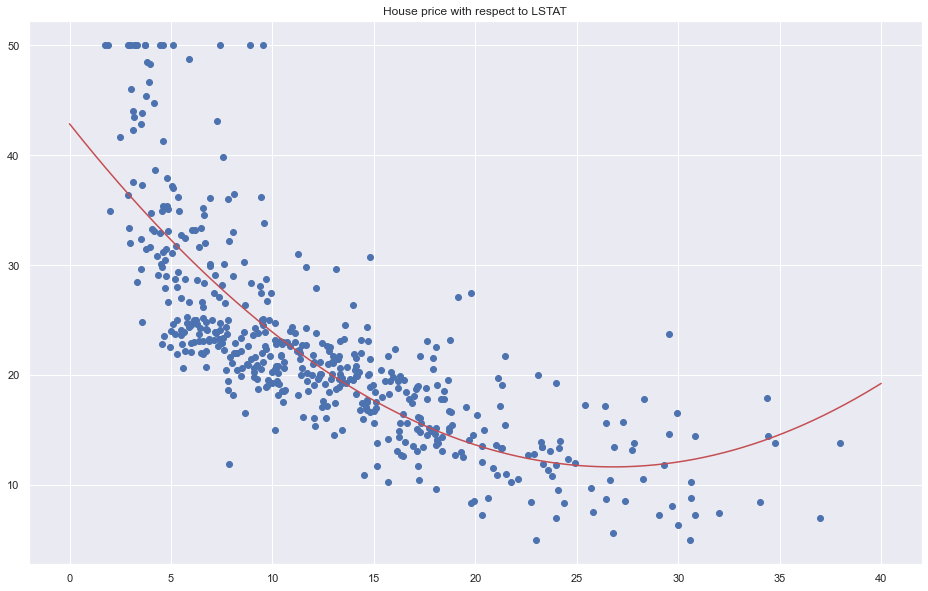

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16, 10))
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit,"r-")
ax.set_title("House price with respect to LSTAT")
plt.show()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

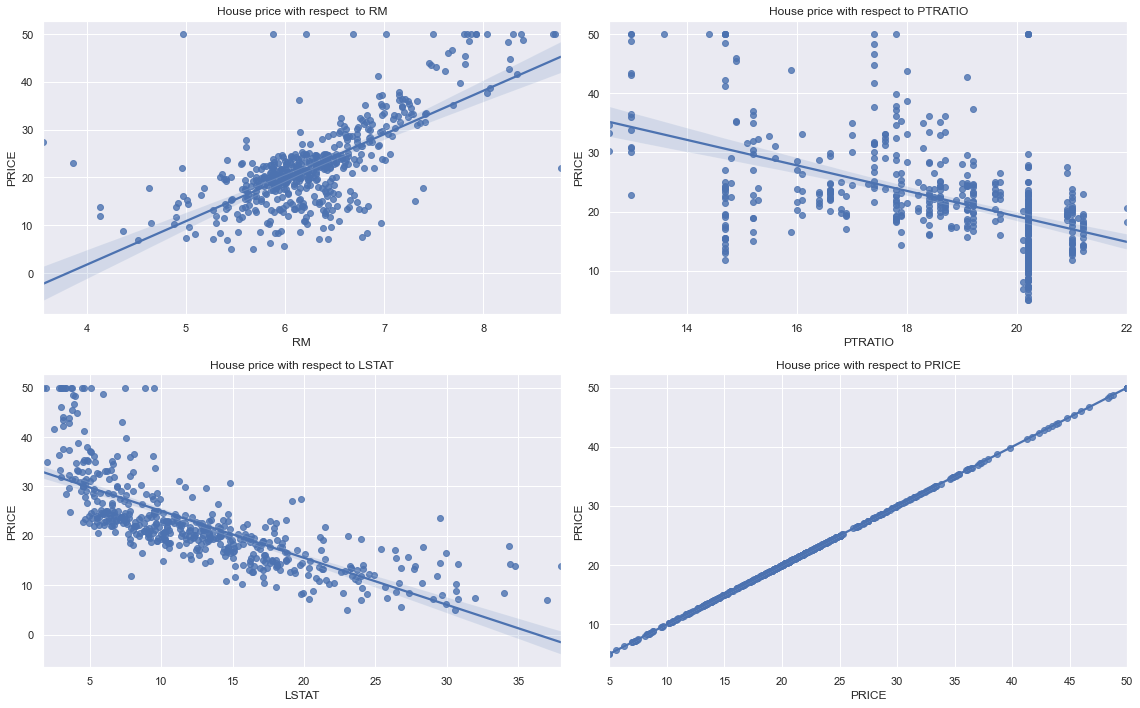

In [48]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16, 10))
ax[0, 0].set_title("House price with respect  to RM")
ax[0, 1].set_title("House price with respect to PTRATIO")
ax[1, 0].set_title("House price with respect to LSTAT")
ax[1, 1].set_title("House price with respect to PRICE")
col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['PRICE'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()